In [2]:
import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import dask
from skimage.morphology import binary_dilation
from multiprocessing import pool


In [3]:
final_image = np.load('subBeadPackPy.npy')

In [4]:
ps.metrics.porosity(final_image)

0.35295867919921875

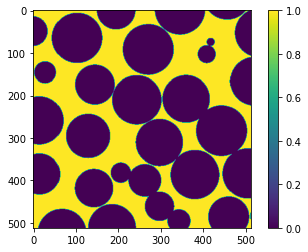

In [5]:
plt.imshow(final_image[:,:,100])
plt.colorbar()

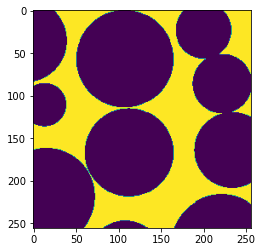

In [12]:
discPoresLoc = ps.filters.find_disconnected_voxels(final_image)
# Trimming blind pores
final_image[discPoresLoc] = False

#plt.imshow(final_image[:,:,100])


filtEdgeIm = ps.filters.fill_blind_pores(final_image)
plt.imshow(filtEdgeIm[:,:,100])

# This did not work, so working on taking the center of the image
centerIM = ps.tools.extract_subsection(final_image,[256,256,256])
plt.imshow(centerIM[:,:,100])

100%|██████████| 25/25 [04:46<00:00, 11.48s/it]


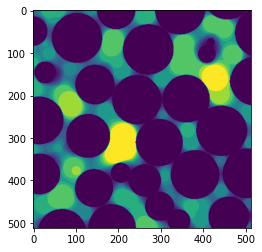

In [6]:
#lt = ps.filters.local_thickness(final_image, parallel=True)
lt = ps.filters.local_thickness(final_image, parallel=False)
plt.imshow(lt[:,:,100])

In [7]:
final_image.shape

(512, 512, 512)

In [8]:
porosimIM = ps.filters.porosimetry(final_image)


 72%|███████▏  | 18/25 [03:44<01:27, 12.49s/it]


KeyboardInterrupt: 

In [ ]:
snow_out = ps.filters.snow_partitioning(final_image, r_max=4, sigma=0.4, return_all=True)

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  892
Peaks after trimming saddle points:  777
Peaks after trimming nearby peaks:  681


TypeError: Invalid shape (512, 512, 512) for image data

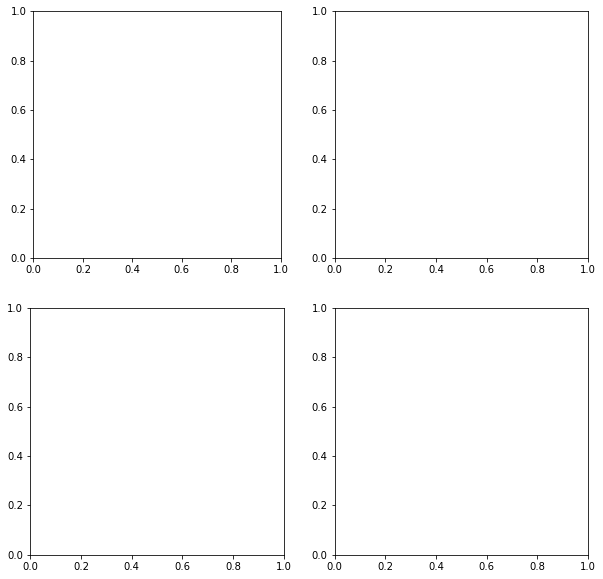

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 10])
ax1.imshow(snow_out.im, origin='lower')
ax2.imshow(snow_out.dt, origin='lower')
dt_peak = snow_out.dt.copy()
peaks_dilated = binary_dilation(snow_out.peaks > 0)
dt_peak[peaks_dilated > 0] = np.nan
cmap = cm.viridis
cmap.set_bad('red', 1.)
ax3.imshow(dt_peak, origin='lower', cmap=cmap)
ax4.imshow(snow_out.regions, origin='lower')
plt.show()